In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv("Downloads/poly.csv")

In [ ]:
df

In [ ]:
plt.scatter(df['Area'],df['Price'])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(df[['Area']],df[['Price']])

In [ ]:
plt.plot(df[['Area']],lr.predict(df[['Area']]),color='r')
plt.plot(df[['Area']],df[['Price']],'b.',marker ='o')

In [ ]:
plt.scatter(df['Area'],df['Price'])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 5,include_bias = True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y ,test_size=0.20, random_state=42 )

In [ ]:
x = df[['Area']].values
y = df[['Price']].values

In [ ]:
x

In [ ]:
y

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)

In [ ]:
print(x_train[1])
print(x_train_trans[1])

In [ ]:
lr.fit(x_train_trans,y_train)

In [ ]:
y_pred = lr.predict(x_test_trans)

In [ ]:
x_test_trans

In [ ]:
y_pred

In [ ]:
df

In [ ]:
x = df['Area'].values
y = df['Price'].values
mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(500,2300,100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [ ]:
# import numpy as np
# x_new = np.linspace(-3,3,8).reshape(1,-1)
# x_poly_t = poly.transform(x_new)
# y_new = lr.predict(x_new)

myline = numpy.linspace(500,2300,100).reshape(1,-1).T

In [ ]:
# y_lr_pred = lr.predict(myline)
# my_line_T = myline.T
my_line_T = poly.fit_transform(myline)
y_lr_pred = lr.predict(my_line_T)
# my_line_T

In [ ]:
import numpy 
# myline = numpy.linspace(500,2300,100).reshape(1,-1)
plt.plot(x_train,y_train,'b.',marker='o')
plt.plot(x_test,y_test,'g.',marker ='o')
plt.plot(myline, y_lr_pred,'r-')
# plt.plot(y_train,x_train_trans,color='r')

In [ ]:
x_new

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

In [56]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [57]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

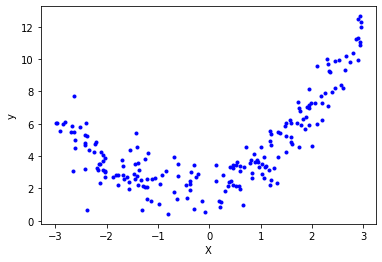

In [58]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [60]:
lr = LinearRegression()

In [61]:
lr.fit(X_train,y_train)

LinearRegression()

In [62]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.34160642567966304

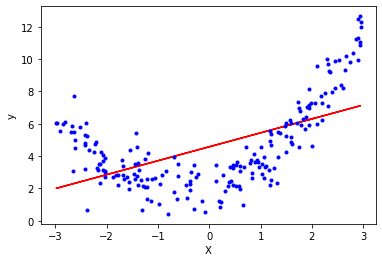

In [63]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [64]:
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [65]:
print(X_train[0])
print(X_train_trans[0])

[2.0599645]
[1.         2.0599645  4.24345373]


In [66]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [67]:
y_pred = lr.predict(X_test_trans)

In [68]:
# y_pred

In [69]:
r2_score(y_test,y_pred)

0.8981501734938755

In [70]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.84314187 0.77556716]]
[2.17185418]


In [71]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

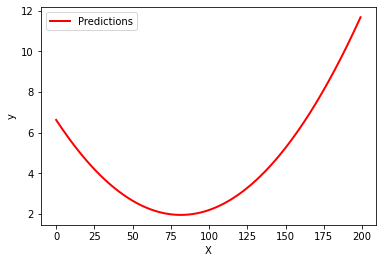

In [72]:
plt.plot(y_new, "r-", linewidth=2, label="Predictions")
# plt.plot(X_new, X_new_poly ,"b.",label='Training points')
# plt.plot(X_test, y_test, "r.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [73]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

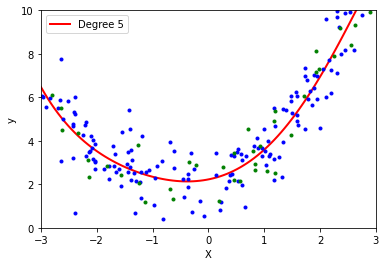

In [75]:
polynomial_regression(5)

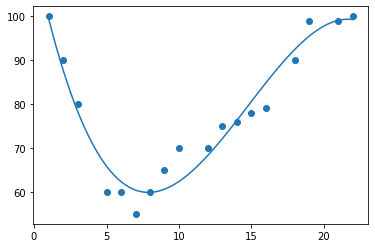

In [76]:
import numpy
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [77]:
myline

array([ 1.        ,  1.21212121,  1.42424242,  1.63636364,  1.84848485,
        2.06060606,  2.27272727,  2.48484848,  2.6969697 ,  2.90909091,
        3.12121212,  3.33333333,  3.54545455,  3.75757576,  3.96969697,
        4.18181818,  4.39393939,  4.60606061,  4.81818182,  5.03030303,
        5.24242424,  5.45454545,  5.66666667,  5.87878788,  6.09090909,
        6.3030303 ,  6.51515152,  6.72727273,  6.93939394,  7.15151515,
        7.36363636,  7.57575758,  7.78787879,  8.        ,  8.21212121,
        8.42424242,  8.63636364,  8.84848485,  9.06060606,  9.27272727,
        9.48484848,  9.6969697 ,  9.90909091, 10.12121212, 10.33333333,
       10.54545455, 10.75757576, 10.96969697, 11.18181818, 11.39393939,
       11.60606061, 11.81818182, 12.03030303, 12.24242424, 12.45454545,
       12.66666667, 12.87878788, 13.09090909, 13.3030303 , 13.51515152,
       13.72727273, 13.93939394, 14.15151515, 14.36363636, 14.57575758,
       14.78787879, 15.        , 15.21212121, 15.42424242, 15.63